# Analysing Tropospheric Formaldehyde (HCHO) gas in Sri Lanka

This project involves the analysis of Atmospheric Tropospheric Formaldehyde gas in Sri Lanka. Real time data has been extracted from the cities of Colombo, Matara, Nuwara Eliya, Kandy, Monaragala, Kurunegala and Jaffna.
<br>
The aim is to identify trends in the HCHO readings with respect to different geographic, natural and human influenced phenomenons.
<br>
We also aim to predict the possible HCHO readings in the future using Machine Learning algorithms.

# Table of Contents

1. [Data Preprocessing](#data-preprocessing)
2. [Data Visualization](#visualization-of-data)
3. [Spatio-Temporal Analysis](#spatio--temporal-analysis)
4. [Machine Learning](#machine-learning)
5. [Communication and Insights](#communication-and-insights)

Importing the necessary libraries.

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

### Formatting the dataframes.
1. Adding the column names to each data frame. 
2. Changing the location names to a single word.
3. Checking for outliers using plots and handling them.
4. Removing the HCHO readings which are negative.
4. Checking for null values and handling them.

In [298]:
# custom method to remove outliers using the z-score
# z score is calculated by finding the difference between the data point and the mean, and this value is divided by the standard deviation

# def remove_outliers_z_score(df, column, threshold=3):
#     mean = df[column].mean()
#     standard_deviation = df[column].std()
#     z_scores = (df[column] - mean)/ standard_deviation
#     df = df[abs(z_scores) < threshold]
#     return df

def remove_outliers_z_score(df, column, threshold=3):
    # Filter out null values from the column
    non_null_df = df[df[column].notnull()]
    
    mean = non_null_df[column].mean()
    standard_deviation = non_null_df[column].std()
    z_scores = (non_null_df[column] - mean) / standard_deviation
    non_null_df = non_null_df[abs(z_scores) < threshold]
    
    # Concatenate original dataframe with modified dataframe
    df = pd.concat([df, non_null_df])
    
    return df

In [299]:
# function to remove negative values from HCHO readings
def negative_value_filter(df, column, threshold=None, remove_nulls=False):
    if remove_nulls:
        df = df[df[column].notnull()]
    if threshold is not None:
        df = df[df[column] >= threshold]
    return df

In [300]:
# defining a function to draw the normal dsitribution plot
def normal_distribution_plot(df, column, color='skyblue'):
    plt.figure(figsize=(10, 8))
    sns.histplot(df[column], kde=True, stat='density', color=color)
    sns.kdeplot(df[column], color='black', linestyle='-')
    plt.title(f"Normal Distribution Plot for {column} column.")
    plt.xlabel("HCHO Reading")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

In [301]:
column_names = ['HCHO_Reading', 'Location', 'Current_Date', 'Next_Date'] # specifying the column names to be added to each  dataframe

#### Colombo Matara Nuwara Eliya Data Frame

In [302]:
col_mat_nuw_df = pd.read_csv("col_mat_nuw_output.csv", header=None)
col_mat_nuw_df.columns = column_names # adding the column names to the dataframe
col_mat_nuw_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya Proper,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya Proper,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya Proper,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya Proper,2023-12-30,2023-12-31


In [303]:
# converting the locations into a single word and make it uniform
col_mat_nuw_df.loc[col_mat_nuw_df['Location'] == "Colombo Proper", "Location"] = "Colombo"
col_mat_nuw_df.loc[col_mat_nuw_df['Location'] == "Deniyaya, Matara", "Location"] = "Matara"
col_mat_nuw_df.loc[col_mat_nuw_df['Location'] == "Nuwara Eliya Proper", "Location"] = "Nuwara Eliya"
col_mat_nuw_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya,2023-12-30,2023-12-31


In [304]:
col_mat_nuw_df.shape # checking the shape of the dataframe

(5478, 4)

In [305]:
col_mat_nuw_df.dtypes # checking the data types of the dataframe

HCHO_Reading    float64
Location         object
Current_Date     object
Next_Date        object
dtype: object

In [306]:
# changing the data types of the date columns to datetime
col_mat_nuw_df["Current_Date"] = pd.to_datetime(col_mat_nuw_df["Current_Date"])
col_mat_nuw_df["Next_Date"]  = pd.to_datetime(col_mat_nuw_df["Next_Date"])
col_mat_nuw_df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

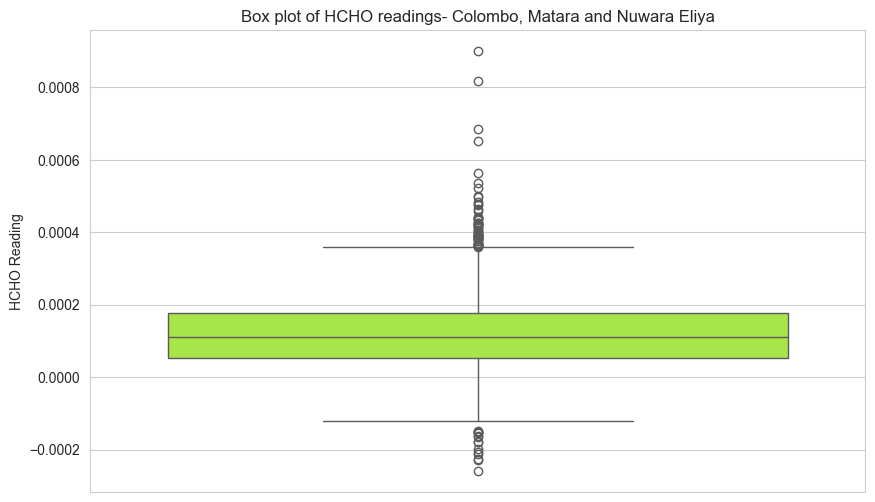

In [307]:
# let us draw a box plot to identify any possible outliers.
plt.figure(figsize=(10, 6))
sns.boxplot(data=col_mat_nuw_df, y='HCHO_Reading', color='greenyellow')
plt.title("Box plot of HCHO readings- Colombo, Matara and Nuwara Eliya")
plt.ylabel("HCHO Reading")
plt.show()

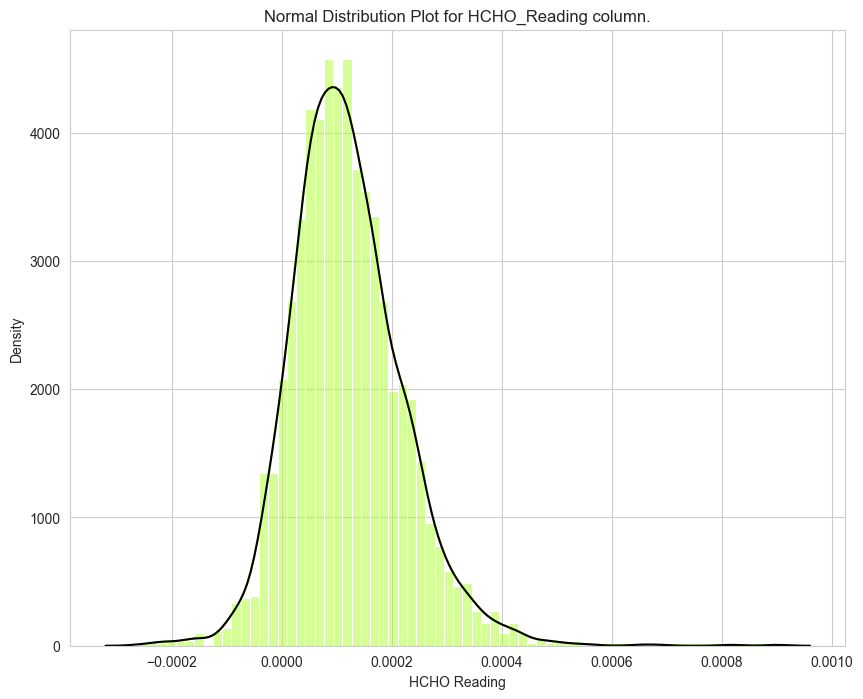

In [308]:
normal_distribution_plot(col_mat_nuw_df, 'HCHO_Reading', color='greenyellow')

In [309]:
# removing the negative HCHO readings
# col_mat_nuw_df = col_mat_nuw_df[col_mat_nuw_df['HCHO_Reading'] >= 0]
# col_mat_nuw_df
col_mat_nuw_df = negative_value_filter(col_mat_nuw_df, 'HCHO_Reading', threshold=0)
col_mat_nuw_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
5427,0.000041,Nuwara Eliya,2023-11-11,2023-11-12
5439,0.000036,Nuwara Eliya,2023-11-23,2023-11-24
5459,0.000108,Nuwara Eliya,2023-12-13,2023-12-14
5463,0.000006,Nuwara Eliya,2023-12-17,2023-12-18


In [310]:
col_mat_nuw_df = remove_outliers_z_score(col_mat_nuw_df, 'HCHO_Reading') # removing the outliers
col_mat_nuw_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
5427,0.000041,Nuwara Eliya,2023-11-11,2023-11-12
5439,0.000036,Nuwara Eliya,2023-11-23,2023-11-24
5459,0.000108,Nuwara Eliya,2023-12-13,2023-12-14
5463,0.000006,Nuwara Eliya,2023-12-17,2023-12-18


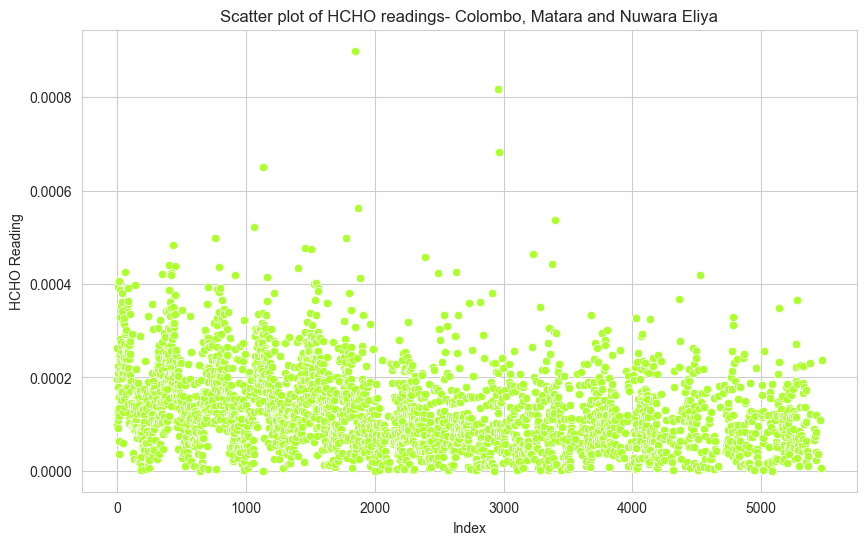

In [311]:
# let us try to draw a scatter plot to see if there is a relationship between the index(effectively thee date) and the HCHO readings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=col_mat_nuw_df, x=col_mat_nuw_df.index, y='HCHO_Reading', color='greenyellow')
plt.title("Scatter plot of HCHO readings- Colombo, Matara and Nuwara Eliya")
plt.xlabel("Index")
plt.ylabel("HCHO Reading")
plt.show()

In [312]:
col_mat_nuw_df.isnull().sum() # checking for null values

HCHO_Reading    0
Location        0
Current_Date    0
Next_Date       0
dtype: int64

In [313]:
mean_hcho_col_mat_nuw = col_mat_nuw_df.groupby('Location')['HCHO_Reading'].mean() # calculating the mean for each location

# defining a function to impute
def imputation_col_mat_nuw(row):
    if pd.isnull(row['HCHO_Reading']):
        return mean_hcho_col_mat_nuw[row['Location']]
    else:
        return row['HCHO_Reading']

col_mat_nuw_df['HCHO_Reading'] = col_mat_nuw_df.apply(imputation_col_mat_nuw, axis=1) # the function is applied to the data frame

In [314]:
col_mat_nuw_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
5427,0.000041,Nuwara Eliya,2023-11-11,2023-11-12
5439,0.000036,Nuwara Eliya,2023-11-23,2023-11-24
5459,0.000108,Nuwara Eliya,2023-12-13,2023-12-14
5463,0.000006,Nuwara Eliya,2023-12-17,2023-12-18


In [315]:
col_mat_nuw_df.isnull().sum() # rechecking for null values

HCHO_Reading    0
Location        0
Current_Date    0
Next_Date       0
dtype: int64

#### Kandy Data Frame

In [316]:
kan_df = pd.read_csv("kan_output.csv", header=None)
kan_df.columns = column_names # adding the column names to the dataframe
kan_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000176,Kandy Proper,2019-01-01,2019-01-02
1,0.000092,Kandy Proper,2019-01-02,2019-01-03
2,NaN,Kandy Proper,2019-01-03,2019-01-04
3,0.000191,Kandy Proper,2019-01-04,2019-01-05
4,0.000122,Kandy Proper,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Kandy Proper,2023-12-27,2023-12-28
1822,NaN,Kandy Proper,2023-12-28,2023-12-29
1823,NaN,Kandy Proper,2023-12-29,2023-12-30
1824,0.000056,Kandy Proper,2023-12-30,2023-12-31


In [317]:
# converting the locations into a single word and make it uniform
kan_df.loc[kan_df['Location'] == "Kandy Proper", "Location"] = "Kandy"
kan_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000176,Kandy,2019-01-01,2019-01-02
1,0.000092,Kandy,2019-01-02,2019-01-03
2,NaN,Kandy,2019-01-03,2019-01-04
3,0.000191,Kandy,2019-01-04,2019-01-05
4,0.000122,Kandy,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Kandy,2023-12-27,2023-12-28
1822,NaN,Kandy,2023-12-28,2023-12-29
1823,NaN,Kandy,2023-12-29,2023-12-30
1824,0.000056,Kandy,2023-12-30,2023-12-31


In [318]:
kan_df.shape # checking the shape of the dataframe

(1826, 4)

In [319]:
kan_df.dtypes # checking the data types of the dataframe

HCHO_Reading    float64
Location         object
Current_Date     object
Next_Date        object
dtype: object

In [320]:
# changing the data types of the date columns to datetime
kan_df["Current_Date"] = pd.to_datetime(kan_df["Current_Date"])
kan_df["Next_Date"]  = pd.to_datetime(kan_df["Next_Date"])
kan_df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

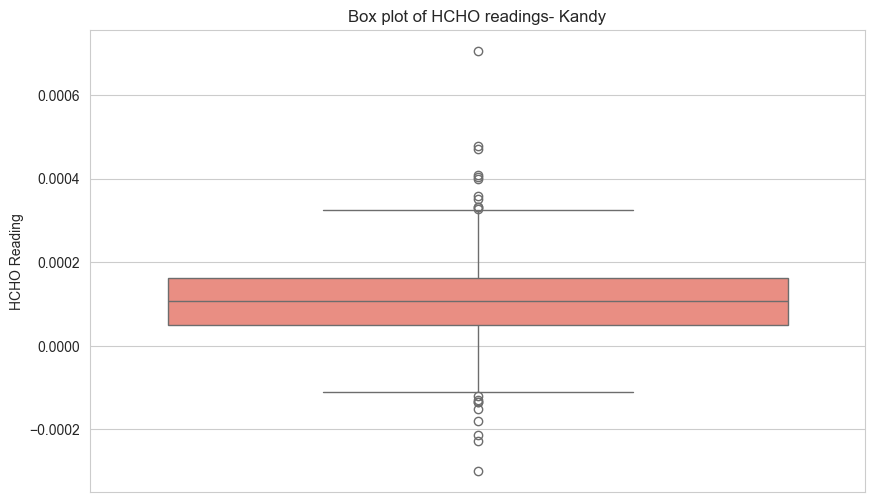

In [321]:
# let us draw a box plot to identify any possible outliers.
plt.figure(figsize=(10, 6))
sns.boxplot(data=kan_df, y='HCHO_Reading', color='salmon')
plt.title("Box plot of HCHO readings- Kandy")
plt.ylabel("HCHO Reading")
plt.show()

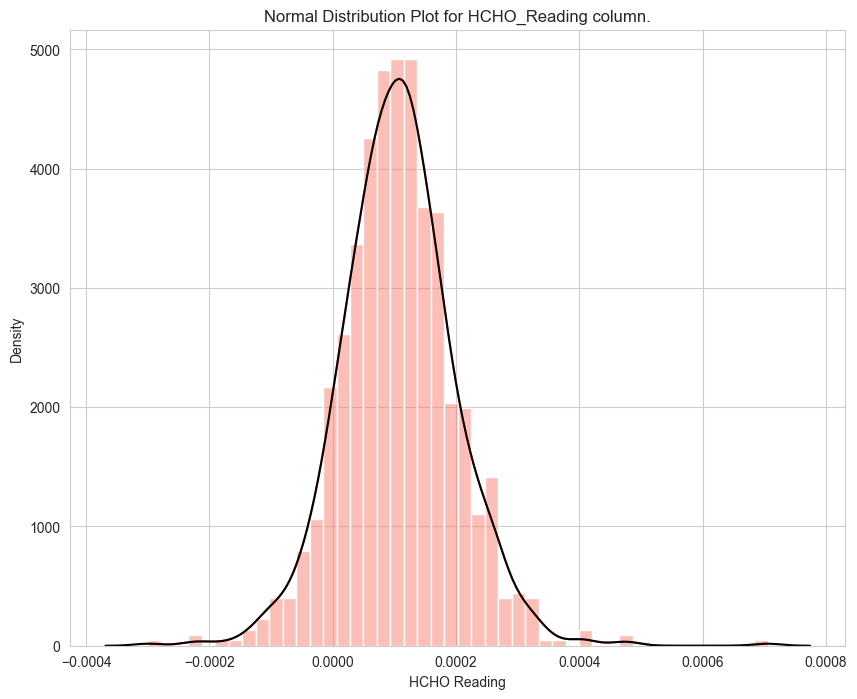

In [322]:
normal_distribution_plot(kan_df, 'HCHO_Reading', color='salmon')

In [323]:
# removing the negative HCHO readings
kan_df = kan_df[kan_df["HCHO_Reading"] >= 0]
kan_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000176,Kandy,2019-01-01,2019-01-02
1,0.000092,Kandy,2019-01-02,2019-01-03
3,0.000191,Kandy,2019-01-04,2019-01-05
4,0.000122,Kandy,2019-01-05,2019-01-06
6,0.000163,Kandy,2019-01-07,2019-01-08
...,...,...,...,...
1801,0.000116,Kandy,2023-12-07,2023-12-08
1805,0.000261,Kandy,2023-12-11,2023-12-12
1815,0.000114,Kandy,2023-12-21,2023-12-22
1817,0.000116,Kandy,2023-12-23,2023-12-24


In [324]:
kan_df = remove_outliers_z_score(kan_df, 'HCHO_Reading') # removing the outliers

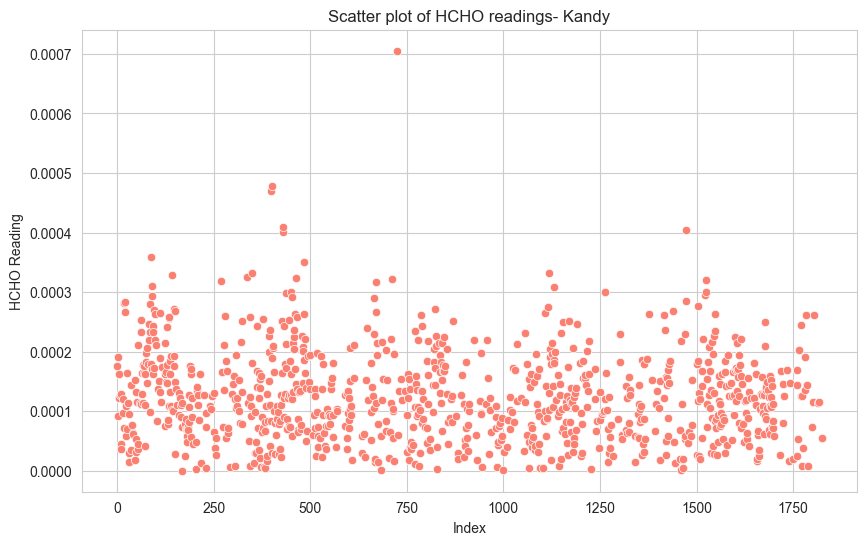

In [325]:
# let us try to draw a scatter plot to see if there is a relationship between the index(effectively thee date) and the HCHO readings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kan_df, x=kan_df.index, y='HCHO_Reading', color='salmon')
plt.title("Scatter plot of HCHO readings- Kandy")
plt.xlabel("Index")
plt.ylabel("HCHO Reading")
plt.show()

In [326]:
kan_df.isnull().sum() # checking for null values

HCHO_Reading    0
Location        0
Current_Date    0
Next_Date       0
dtype: int64

In [327]:
kan_df['HCHO_Reading'].fillna(kan_df['HCHO_Reading'].mean(), inplace=True) # imputing the missing values using the mean.
kan_df

C:\Users\arkha\AppData\Local\Temp\ipykernel_21584\2827834565.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kan_df['HCHO_Reading'].fillna(kan_df['HCHO_Reading'].mean(), inplace=True) # imputing the missing values using the mean.


,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000176,Kandy,2019-01-01,2019-01-02
1,0.000092,Kandy,2019-01-02,2019-01-03
3,0.000191,Kandy,2019-01-04,2019-01-05
4,0.000122,Kandy,2019-01-05,2019-01-06
6,0.000163,Kandy,2019-01-07,2019-01-08
...,...,...,...,...
1801,0.000116,Kandy,2023-12-07,2023-12-08
1805,0.000261,Kandy,2023-12-11,2023-12-12
1815,0.000114,Kandy,2023-12-21,2023-12-22
1817,0.000116,Kandy,2023-12-23,2023-12-24


In [328]:
kan_df.isnull().sum() # rechecking for null values 

HCHO_Reading    0
Location        0
Current_Date    0
Next_Date       0
dtype: int64

#### Monaragala Kurunegala Jaffna Data Frame

In [329]:
mon_kur_jaf_df = pd.read_csv("mon_kur_jaf_output.csv", header=None)
mon_kur_jaf_df.columns = column_names # adding the column names to the dataframe
mon_kur_jaf_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,NaN,"Bibile, Monaragala",2019-01-01,2019-01-02
1,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
2,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
3,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
4,-0.000018,"Bibile, Monaragala",2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna Proper,2023-12-27,2023-12-28
5474,0.000051,Jaffna Proper,2023-12-28,2023-12-29
5475,0.000127,Jaffna Proper,2023-12-29,2023-12-30
5476,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [330]:
# converting the locations into a single word and make it uniform
mon_kur_jaf_df.loc[mon_kur_jaf_df['Location'] == "Bibile, Monaragala", "Location"] = "Monaragala"
mon_kur_jaf_df.loc[mon_kur_jaf_df['Location'] == "Kurunegala Proper", "Location"] = "Kurunegala"
mon_kur_jaf_df.loc[mon_kur_jaf_df['Location'] == "Jaffna Proper", "Location"] = "Jaffna"
mon_kur_jaf_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,NaN,Monaragala,2019-01-01,2019-01-02
1,0.000019,Monaragala,2019-01-02,2019-01-03
2,0.000028,Monaragala,2019-01-03,2019-01-04
3,0.000037,Monaragala,2019-01-04,2019-01-05
4,-0.000018,Monaragala,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna,2023-12-27,2023-12-28
5474,0.000051,Jaffna,2023-12-28,2023-12-29
5475,0.000127,Jaffna,2023-12-29,2023-12-30
5476,0.000117,Jaffna,2023-12-30,2023-12-31


In [331]:
mon_kur_jaf_df.shape # checking the shape of the dataframe

(5478, 4)

In [332]:
mon_kur_jaf_df.dtypes # checking the data types of the dataframe

HCHO_Reading    float64
Location         object
Current_Date     object
Next_Date        object
dtype: object

In [333]:
# changing the data types of the date columns to datetime
mon_kur_jaf_df["Current_Date"] = pd.to_datetime(mon_kur_jaf_df["Current_Date"])
mon_kur_jaf_df["Next_Date"]  = pd.to_datetime(mon_kur_jaf_df["Next_Date"])
mon_kur_jaf_df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

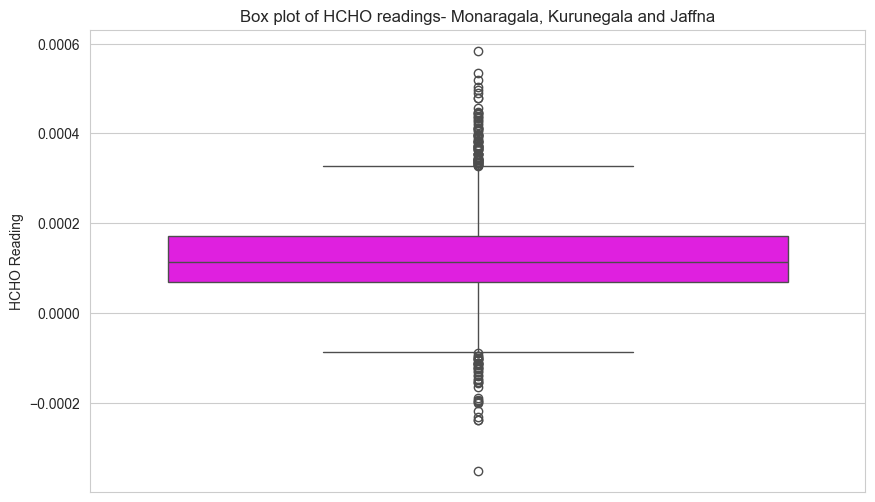

In [334]:
# let us draw a box plot to identify any possible outliers.
plt.figure(figsize=(10, 6))
sns.boxplot(data=mon_kur_jaf_df, y='HCHO_Reading', color='fuchsia')
plt.title("Box plot of HCHO readings- Monaragala, Kurunegala and Jaffna")
plt.ylabel("HCHO Reading")
plt.show()

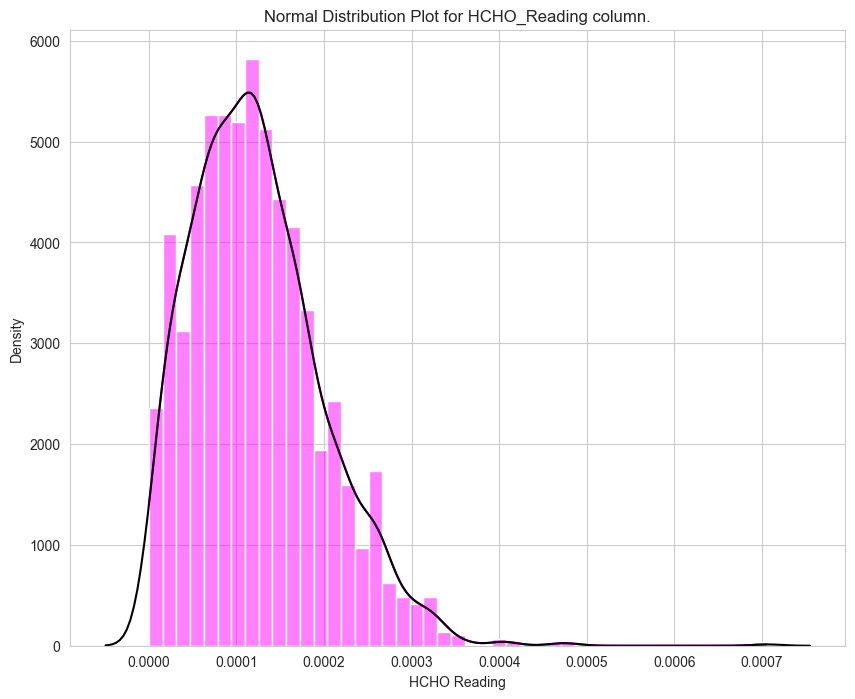

In [335]:
normal_distribution_plot(kan_df, 'HCHO_Reading', color='fuchsia')

In [336]:
# removing the negative HCHO readings
mon_kur_jaf_df = mon_kur_jaf_df[mon_kur_jaf_df['HCHO_Reading'] >= 0]
mon_kur_jaf_df

,HCHO_Reading,Location,Current_Date,Next_Date
1,0.000019,Monaragala,2019-01-02,2019-01-03
2,0.000028,Monaragala,2019-01-03,2019-01-04
3,0.000037,Monaragala,2019-01-04,2019-01-05
5,0.000146,Monaragala,2019-01-06,2019-01-07
6,0.000028,Monaragala,2019-01-07,2019-01-08
...,...,...,...,...
5470,0.000088,Jaffna,2023-12-24,2023-12-25
5474,0.000051,Jaffna,2023-12-28,2023-12-29
5475,0.000127,Jaffna,2023-12-29,2023-12-30
5476,0.000117,Jaffna,2023-12-30,2023-12-31


In [337]:
mon_kur_jaf_df = remove_outliers_z_score(mon_kur_jaf_df, 'HCHO_Reading') # removing the outliers

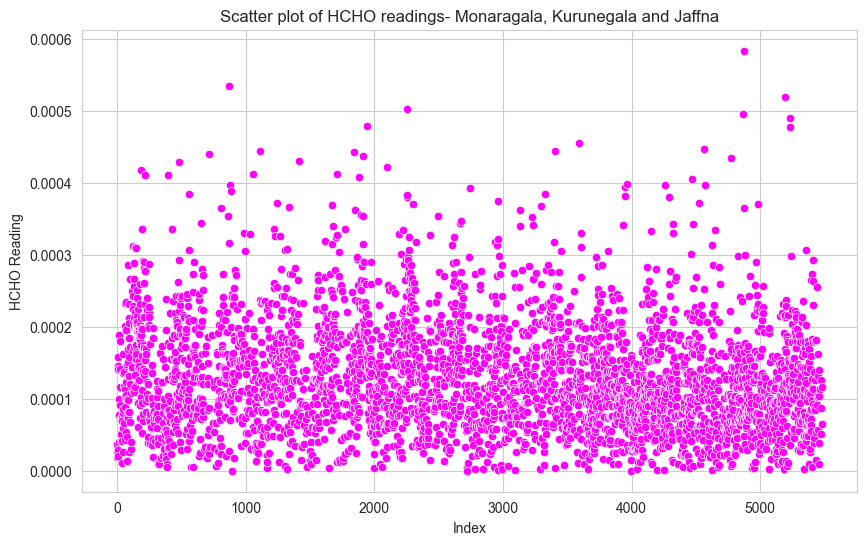

In [338]:
# let us try to draw a scatter plot to see if there is a relationship between the index(effectively thee date) and the HCHO readings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mon_kur_jaf_df, x=mon_kur_jaf_df.index, y='HCHO_Reading', color='fuchsia')
plt.title("Scatter plot of HCHO readings- Monaragala, Kurunegala and Jaffna")
plt.xlabel("Index")
plt.ylabel("HCHO Reading")
plt.show()

In [339]:
mon_kur_jaf_df.isnull().sum() # checking for null values

HCHO_Reading    0
Location        0
Current_Date    0
Next_Date       0
dtype: int64

In [340]:
mean_hcho_mon_kur_jaf = mon_kur_jaf_df.groupby('Location')['HCHO_Reading'].mean() # calculating the mean for each location in the data frame

# defining a function to impute for this particular data frame
def imputation_mon_kur_jaf(row):
    if pd.isnull(row['HCHO_Reading']):
        return mean_hcho_mon_kur_jaf[row['Location']]
    else:
        return row['HCHO_Reading']
    
mon_kur_jaf_df['HCHO_Reading'] = mon_kur_jaf_df.apply(imputation_mon_kur_jaf, axis=1) # the function is applied to the data frame

In [341]:
mon_kur_jaf_df

,HCHO_Reading,Location,Current_Date,Next_Date
1,0.000019,Monaragala,2019-01-02,2019-01-03
2,0.000028,Monaragala,2019-01-03,2019-01-04
3,0.000037,Monaragala,2019-01-04,2019-01-05
5,0.000146,Monaragala,2019-01-06,2019-01-07
6,0.000028,Monaragala,2019-01-07,2019-01-08
...,...,...,...,...
5470,0.000088,Jaffna,2023-12-24,2023-12-25
5474,0.000051,Jaffna,2023-12-28,2023-12-29
5475,0.000127,Jaffna,2023-12-29,2023-12-30
5476,0.000117,Jaffna,2023-12-30,2023-12-31


In [342]:
mon_kur_jaf_df.isnull().sum() # rechecking for null values

HCHO_Reading    0
Location        0
Current_Date    0
Next_Date       0
dtype: int64

### Merging the Data Frames.

Let us merge the three data frames into one combined data frame.

In [343]:
combined_df = pd.concat([col_mat_nuw_df,kan_df.iloc[1:],mon_kur_jaf_df.iloc[1:]], ignore_index=True) # merging while removing the first row of the second and third data frames
combined_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
14618,0.000088,Jaffna,2023-12-24,2023-12-25
14619,0.000051,Jaffna,2023-12-28,2023-12-29
14620,0.000127,Jaffna,2023-12-29,2023-12-30
14621,0.000117,Jaffna,2023-12-30,2023-12-31


Let us check the statistical measures for the overall dataset.

In [344]:
combined_df['HCHO_Reading'].describe() # getting the statistical measures for the overall dataset

count    1.462300e+04
mean     1.302203e-04
std      7.912423e-05
min      8.485600e-08
25%      7.173251e-05
50%      1.184691e-04
75%      1.758248e-04
max      8.997102e-04
Name: HCHO_Reading, dtype: float64

Let us print the statistical measures of HCHO reading for each location.

In [345]:
from tabulate import tabulate
locations = ["Colombo","Matara","Nuwara Eliya","Monaragala","Kurunegala","Jaffna","Kandy"] # storing all the locations in a list

grouped_statistics = combined_df.groupby('Location')['HCHO_Reading'].describe() # grouping by the location and getting statistical analysis

rounded_grouped_statistics = grouped_statistics.round(6) # rounding off the values to 6 decimal places
print(rounded_grouped_statistics.to_string())

               count      mean       std  min       25%       50%       75%       max
Location                                                                             
Colombo       2557.0  0.000165  0.000089  0.0  0.000100  0.000155  0.000222  0.000650
Jaffna        2791.0  0.000114  0.000067  0.0  0.000067  0.000103  0.000149  0.000584
Kandy         1842.0  0.000123  0.000074  0.0  0.000069  0.000115  0.000166  0.000705
Kurunegala    2341.0  0.000141  0.000076  0.0  0.000085  0.000133  0.000188  0.000503
Matara        1717.0  0.000107  0.000078  0.0  0.000053  0.000092  0.000147  0.000900
Monaragala    2086.0  0.000138  0.000077  0.0  0.000080  0.000130  0.000188  0.000535
Nuwara Eliya  1289.0  0.000107  0.000071  0.0  0.000051  0.000097  0.000147  0.000419


In [346]:
# viewing as a table
print(tabulate(rounded_grouped_statistics, headers='keys', tablefmt='psql')) # the table is printed in psql format

+--------------+---------+----------+---------+-------+---------+----------+----------+----------+
| Location     |   count |     mean |     std |   min |     25% |      50% |      75% |      max |
|--------------+---------+----------+---------+-------+---------+----------+----------+----------|
| Colombo      |    2557 | 0.000165 | 8.9e-05 |     0 | 0.0001  | 0.000155 | 0.000222 | 0.00065  |
| Jaffna       |    2791 | 0.000114 | 6.7e-05 |     0 | 6.7e-05 | 0.000103 | 0.000149 | 0.000584 |
| Kandy        |    1842 | 0.000123 | 7.4e-05 |     0 | 6.9e-05 | 0.000115 | 0.000166 | 0.000705 |
| Kurunegala   |    2341 | 0.000141 | 7.6e-05 |     0 | 8.5e-05 | 0.000133 | 0.000188 | 0.000503 |
| Matara       |    1717 | 0.000107 | 7.8e-05 |     0 | 5.3e-05 | 9.2e-05  | 0.000147 | 0.0009   |
| Monaragala   |    2086 | 0.000138 | 7.7e-05 |     0 | 8e-05   | 0.00013  | 0.000188 | 0.000535 |
| Nuwara Eliya |    1289 | 0.000107 | 7.1e-05 |     0 | 5.1e-05 | 9.7e-05  | 0.000147 | 0.000419 |
+---------

## Visualization of Data

Let us try to analyze the HCHO reading variation based on the location using a barplot.

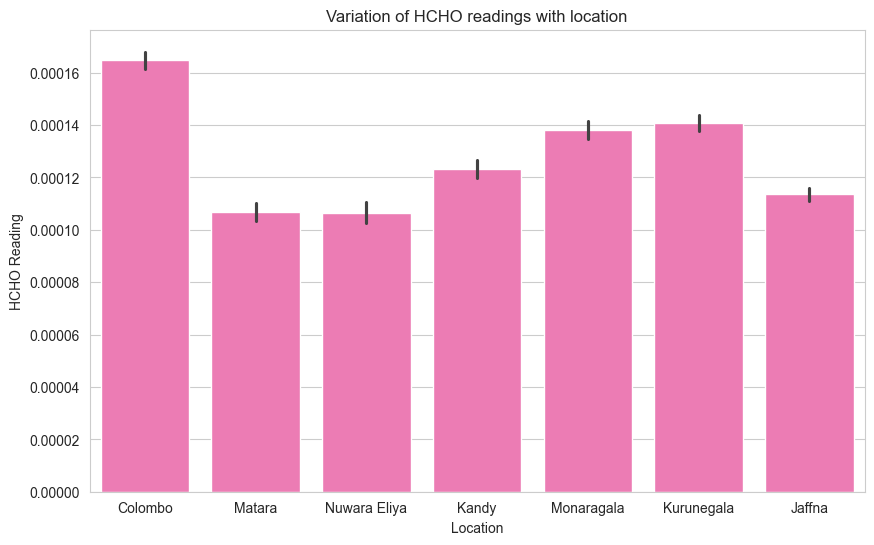

In [347]:
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x='Location', y='HCHO_Reading', color='hotpink')
plt.title("Variation of HCHO readings with location")
plt.xlabel("Location")
plt.ylabel("HCHO Reading")
plt.show()

Let us draw a histogram for the HCHO reading.

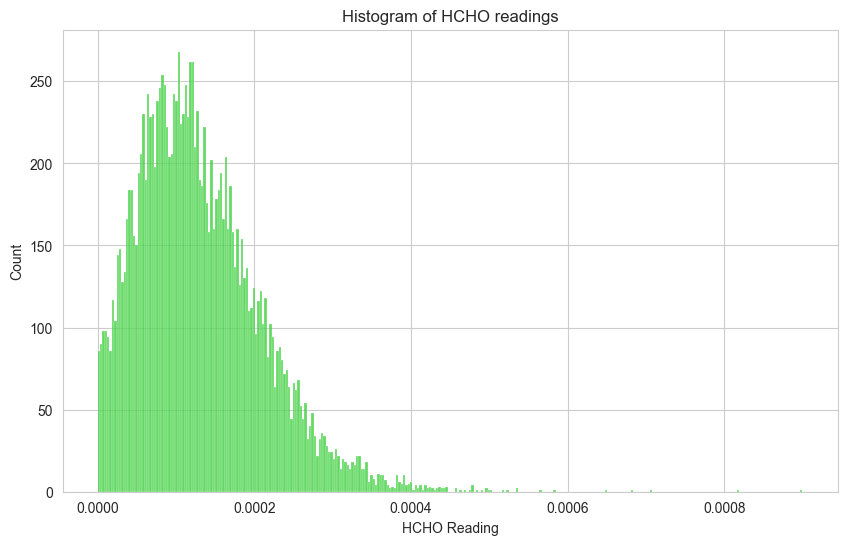

In [348]:
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x="HCHO_Reading", bins=300, color="limegreen")

plt.title("Histogram of HCHO readings")
plt.xlabel("HCHO Reading")
plt.show()

Let us analyze the spread of the HCHO readings for the whole dataset based on the location.

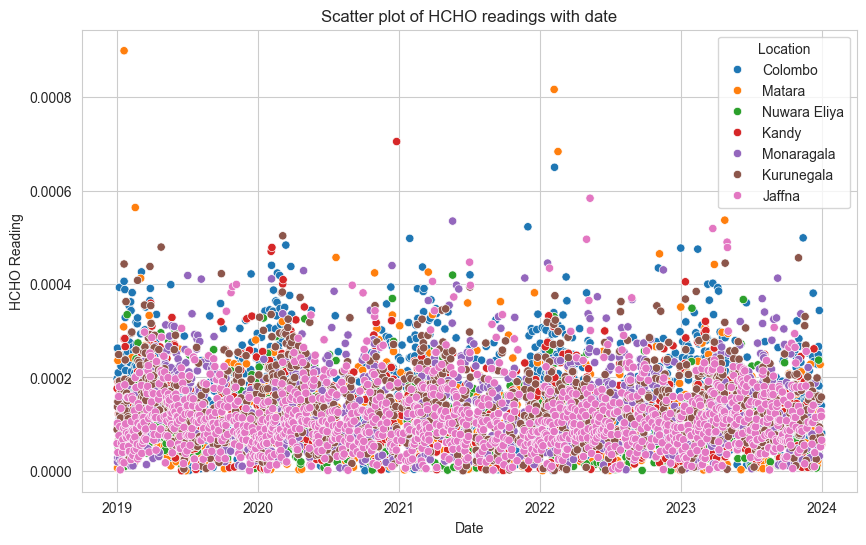

In [349]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=combined_df, x="Current_Date", y="HCHO_Reading", hue="Location")
plt.title("Scatter plot of HCHO readings with date")
plt.xlabel("Date")
plt.ylabel("HCHO Reading")
plt.show()

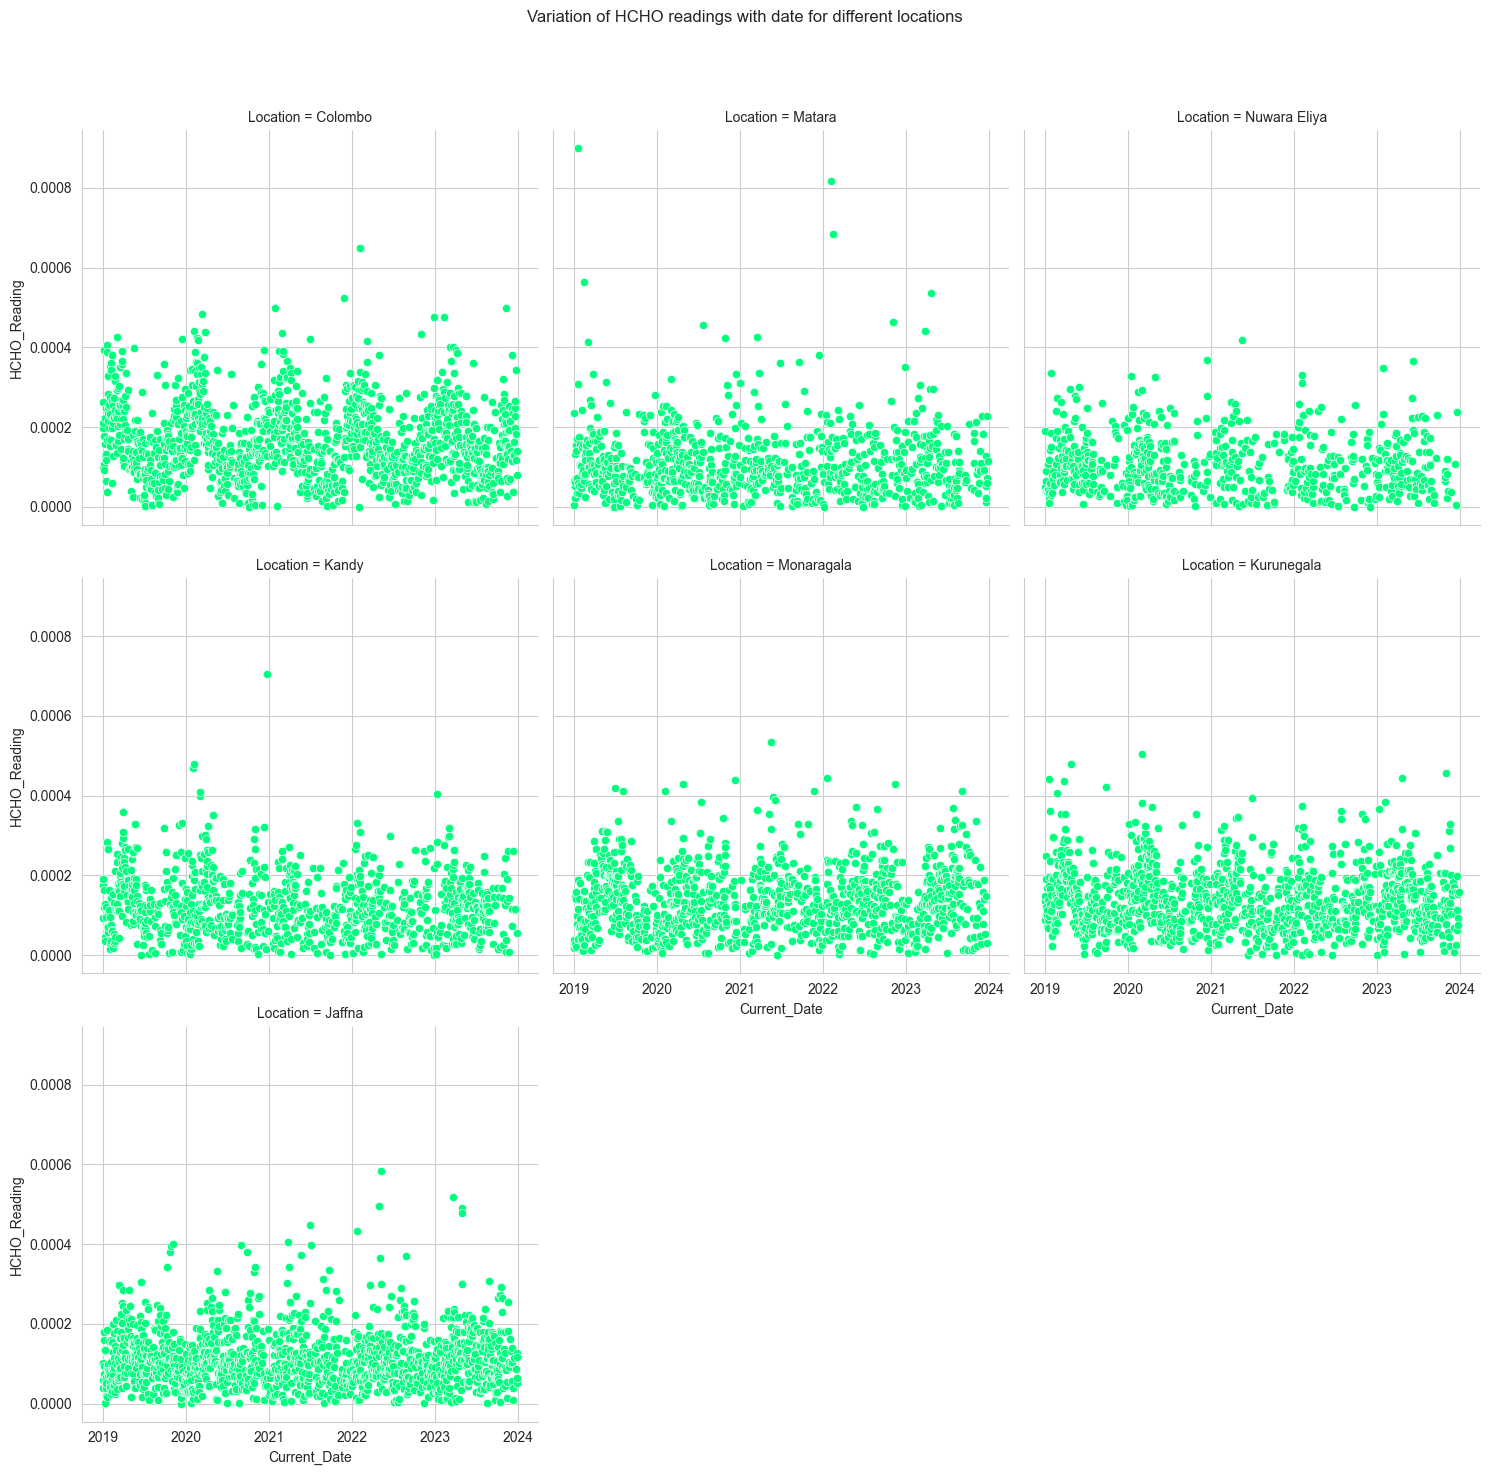

In [350]:
# let us draw the scatterplot for each location separately
graph = sns.FacetGrid(combined_df, col='Location', col_wrap=3, height=5)
graph.map(sns.scatterplot, "Current_Date", "HCHO_Reading", color="springgreen")
plt.subplots_adjust(top=0.9)
graph.fig.suptitle("Variation of HCHO readings with date for different locations")
plt.show()

## Spatio- Temporal Analysis

#### Mean height of cities above sea level
* Colombo- 38ft
* Matara- 33ft
* Nuwara Eliya- 6,139ft
* Kandy- 1,660ft
* Monaragala-465ft
* Kurunegala-399ft
* Jaffna- 27ft

- Source: https://whatismyelevation.com/

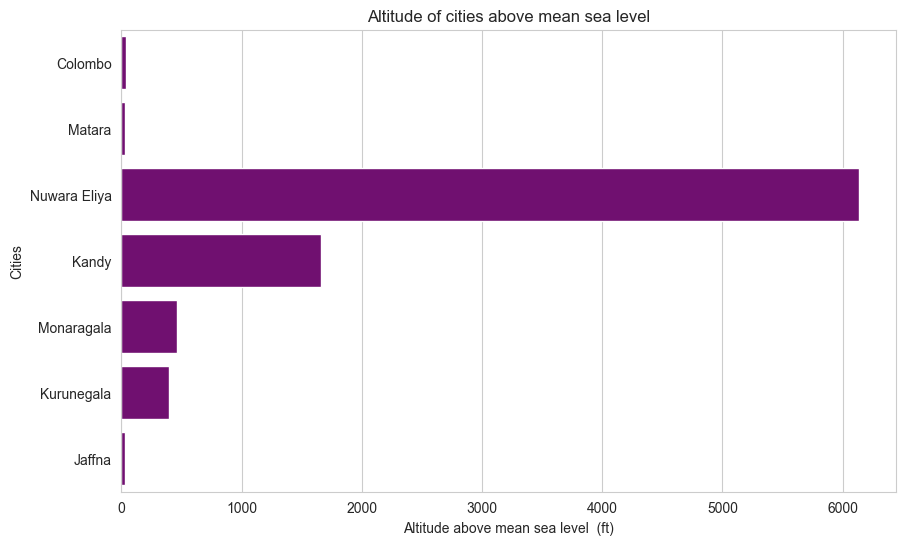

In [351]:
#let us make a plot of the altitudes of each city
plt.figure(figsize=(10,6))
cities = ['Colombo','Matara','Nuwara Eliya','Kandy','Monaragala','Kurunegala','Jaffna']
altitude = [38,33,6139,1660,465,399,27]
sns.barplot(x=altitude, y=cities, color='purple')
plt.title("Altitude of cities above mean sea level")
plt.ylabel("Cities")
plt.xlabel("Altitude above mean sea level  (ft)")
plt.show()

### Population density of the cities
* Colombo- 13,364 persons/km^2
* Matara- 630 persons/km^2
* Nuwara Eliya- 3,197 persons/km^2
* Kandy-710 persons/km^2
* Monaragala- 152 persons/km^2
* Kurunegala- 362 persons/km^2
* Jaffna- 611 persons/km^2

- Source: [Wikipedia](https://www.wikipedia.org/)

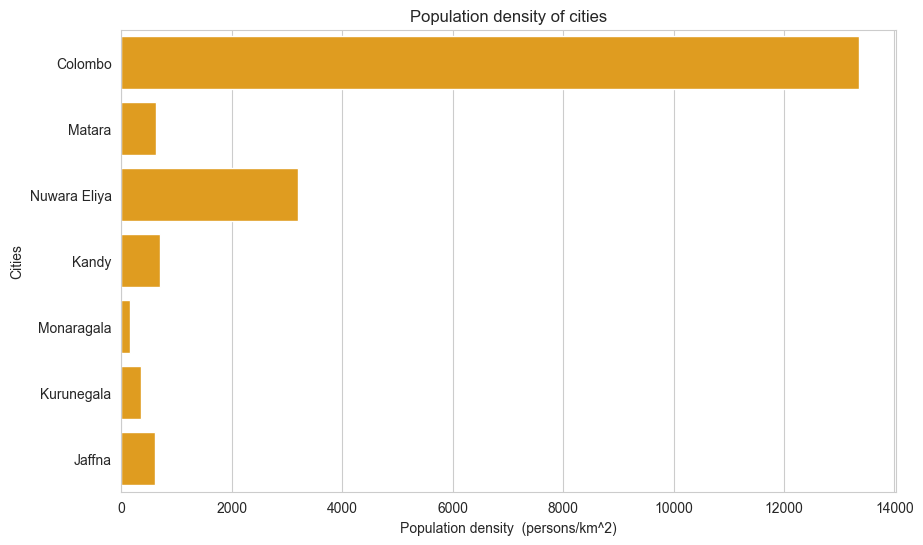

In [352]:
# let us make a plot of the population density for each city
plt.figure(figsize=(10,6))
cities = ['Colombo','Matara','Nuwara Eliya','Kandy','Monaragala','Kurunegala','Jaffna']
population_density = [13364,630,3197,710,152,362,611]
sns.barplot(x=population_density, y=cities, color='orange')
plt.title("Population density of cities")
plt.ylabel("Cities")
plt.xlabel("Population density  (persons/km^2)")
plt.show()

### Average temperature for each month

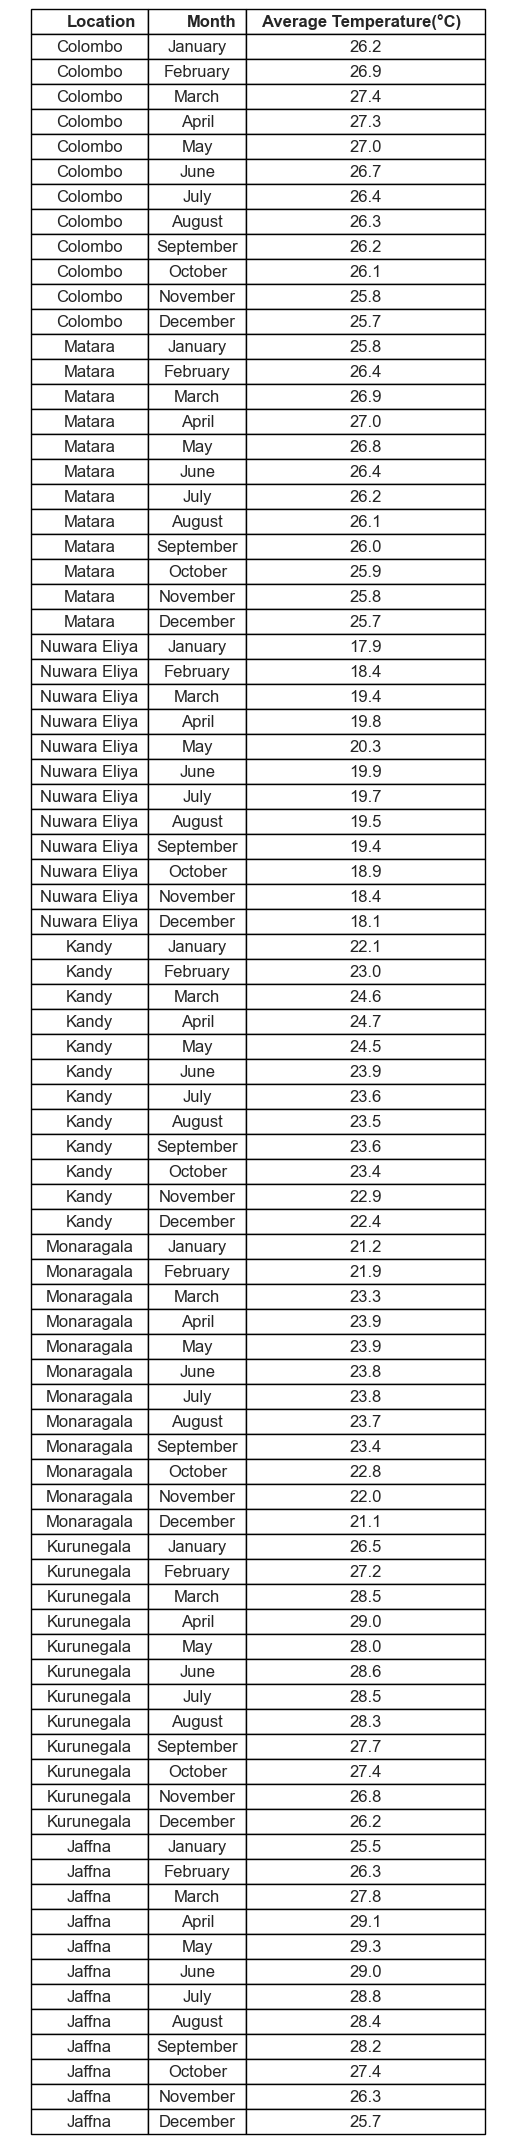

In [353]:
temp_data = [
    ["Location", "Month","Average Temperature(°C)"],
    ["Colombo", "January", 26.2],
    ["Colombo", "February", 26.9],
    ["Colombo", "March", 27.4],
    ["Colombo", "April", 27.3],
    ["Colombo", "May", 27.0],
    ["Colombo", "June", 26.7],
    ["Colombo", "July", 26.4],
    ["Colombo", "August", 26.3,],
    ["Colombo", "September", 26.2],
    ["Colombo", "October", 26.1],
    ["Colombo", "November", 25.8],
    ["Colombo", "December", 25.7],
    ["Matara", "January", 25.8],
    ["Matara", "February", 26.4],
    ["Matara", "March", 26.9],
    ["Matara", "April", 27.0],
    ["Matara", "May", 26.8],
    ["Matara", "June", 26.4],
    ["Matara", "July", 26.2],
    ["Matara", "August", 26.1],
    ["Matara", "September", 26.0],
    ["Matara", "October", 25.9],
    ["Matara", "November", 25.8],
    ["Matara", "December", 25.7],
    ["Nuwara Eliya", "January", 17.9],
    ["Nuwara Eliya", "February", 18.4],
    ["Nuwara Eliya", "March", 19.4],
    ["Nuwara Eliya", "April", 19.8],
    ["Nuwara Eliya", "May", 20.3],
    ["Nuwara Eliya", "June", 19.9],
    ["Nuwara Eliya", "July", 19.7],
    ["Nuwara Eliya", "August", 19.5],
    ["Nuwara Eliya", "September", 19.4],
    ["Nuwara Eliya", "October", 18.9],
    ["Nuwara Eliya", "November", 18.4],
    ["Nuwara Eliya", "December", 18.1],
    ["Kandy", "January", 22.1],
    ["Kandy", "February", 23.0],
    ["Kandy", "March", 24.6],
    ["Kandy", "April", 24.7],
    ["Kandy", "May", 24.5],
    ["Kandy", "June", 23.9],
    ["Kandy", "July", 23.6],
    ["Kandy", "August", 23.5],
    ["Kandy", "September", 23.6],
    ["Kandy", "October", 23.4],
    ["Kandy", "November", 22.9],
    ["Kandy", "December", 22.4],
    ["Monaragala", "January", 21.2],
    ["Monaragala", "February", 21.9],
    ["Monaragala", "March", 23.3],
    ["Monaragala", "April", 23.9],
    ["Monaragala", "May", 23.9],
    ["Monaragala", "June", 23.8],
    ["Monaragala", "July", 23.8],
    ["Monaragala", "August", 23.7],
    ["Monaragala", "September", 23.4],
    ["Monaragala", "October", 22.8],
    ["Monaragala", "November", 22.0],
    ["Monaragala", "December", 21.1],
    ["Kurunegala", "January", 26.5],
    ["Kurunegala", "February", 27.2],
    ["Kurunegala", "March", 28.5],
    ["Kurunegala", "April", 29.0],
    ["Kurunegala", "May", 28.0],
    ["Kurunegala", "June", 28.6],
    ["Kurunegala", "July", 28.5],
    ["Kurunegala", "August", 28.3],
    ["Kurunegala", "September", 27.7],
    ["Kurunegala", "October", 27.4],
    ["Kurunegala", "November", 26.8],
    ["Kurunegala", "December", 26.2],
    ["Jaffna", "January", 25.5],
    ["Jaffna", "February", 26.3],
    ["Jaffna", "March", 27.8],
    ["Jaffna", "April", 29.1],
    ["Jaffna", "May", 29.3],
    ["Jaffna", "June", 29.0],
    ["Jaffna", "July", 28.8],
    ["Jaffna", "August", 28.4],
    ["Jaffna", "September", 28.2],
    ["Jaffna", "October", 27.4],
    ["Jaffna", "November", 26.3],
    ["Jaffna", "December", 25.7]
]

# creating the figure and the axis
figure, ax = plt.subplots()
# the axis can be omitted
ax.axis('off')
# creating the table
table = ax.table(cellText=temp_data, loc='center')

#making the heading bold
for (i,j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(weight='bold')

# center aligning the content
for col in range(len(temp_data[0])):
    table.auto_set_column_width(col)
    for row in range(1, len(temp_data)):
        cell = table.get_celld()[(row, col)]
        cell.set_text_props(horizontalalignment='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)
plt.show()

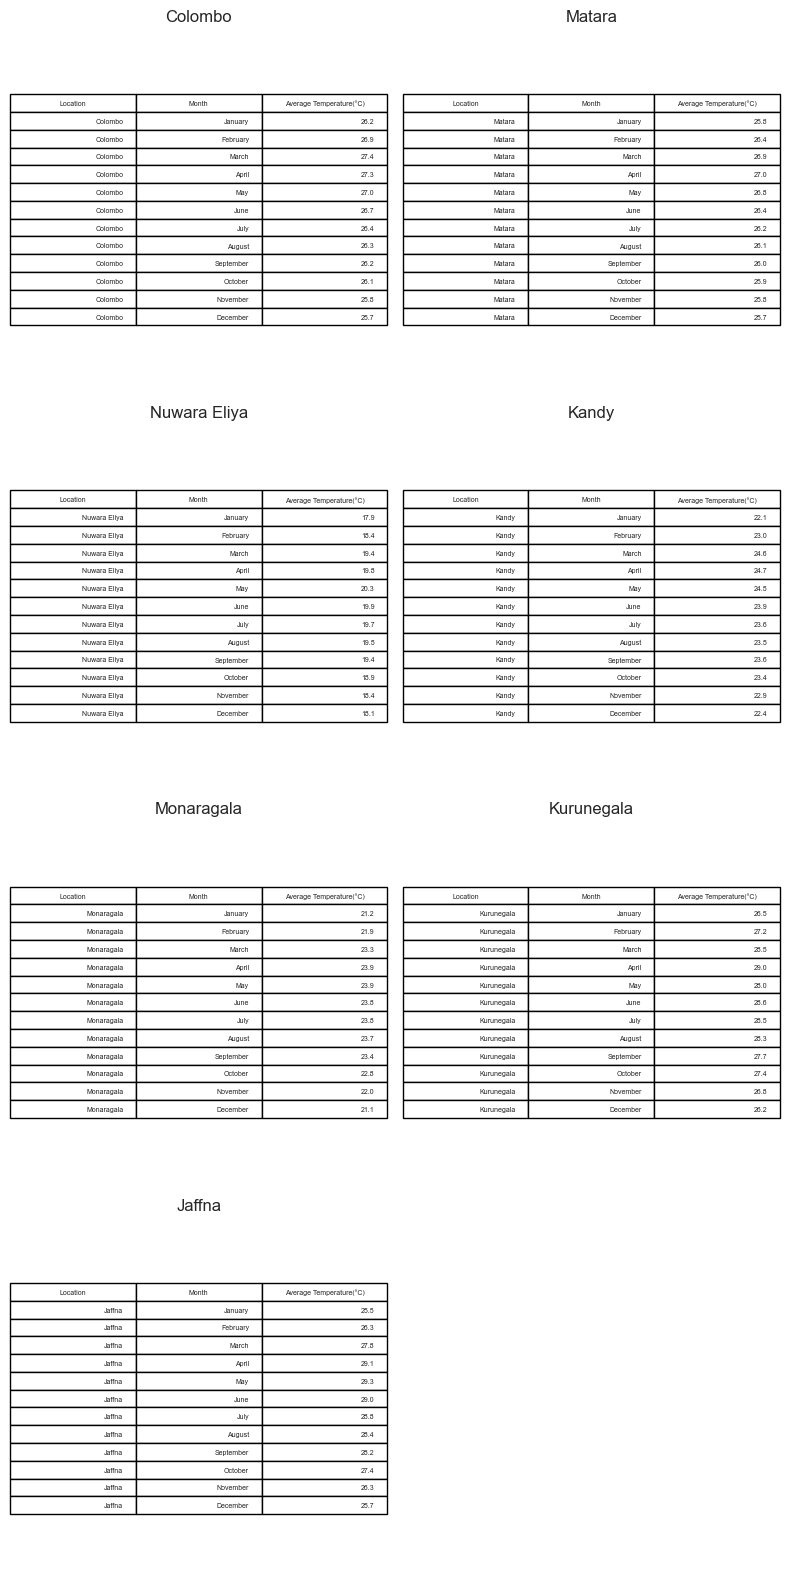

In [354]:
#Let us analyze for each city separately
# Convert temp_data to a DataFrame
temp_df = pd.DataFrame(temp_data[1:], columns=temp_data[0])

# Create a FacetGrid with one row for each city
g = sns.FacetGrid(temp_df, col='Location', col_wrap=2, height=4, margin_titles=True)

# Define a function to plot tables
def plot_table(data, color, **kwargs):
    ax = plt.gca()
    ax.axis('off')
    ax.table(cellText=data.values, colLabels=data.columns, loc='center')
    ax.set_title(data['Location'].iloc[0])

# Map the function over the FacetGrid
g.map_dataframe(plot_table)

plt.tight_layout()
plt.show()

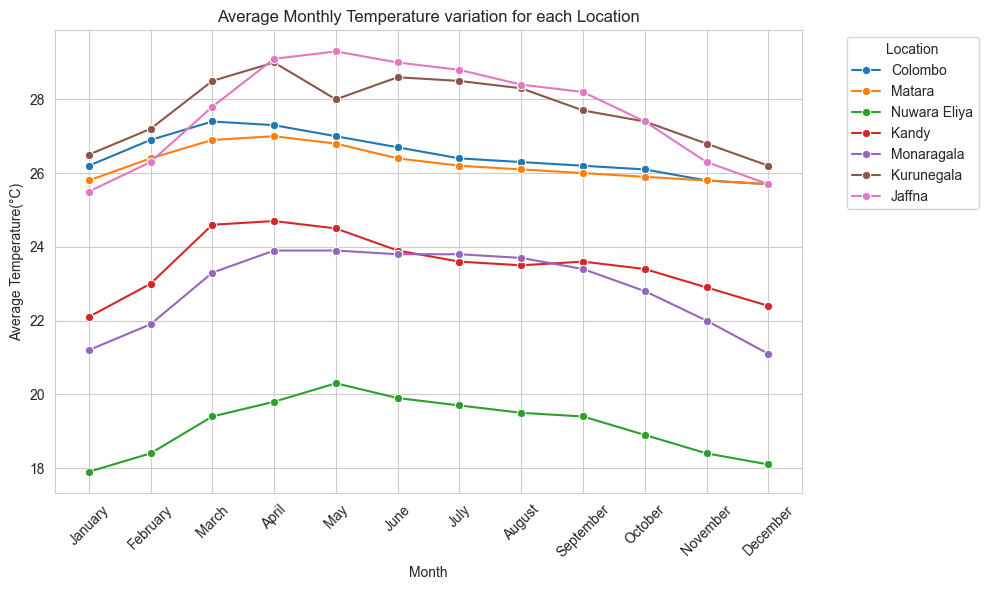

In [355]:
# let us make a line plot to see how the temperature varies in each city monthly
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=temp_df, x='Month', y='Average Temperature(°C)', hue='Location', marker='o')
plt.title('Average Monthly Temperature variation for each Location')
plt.xlabel('Month')
plt.ylabel('Average Temperature(°C)')
plt.xticks(rotation=45)
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Machine Learning

## Communication and Insights